## 1.
生成训练集：用函数$y=\sin(7x)+\xi$生成训练集，其中$\xi$是均值为0的随机小扰动。样本数$m=40$，并将$x$限制在区间$[0,1]$。比如可以用如下代码生成：
```
random_perturbation = 0.2*(np.random.rand(m,1) - 0.5)
```

In [5]:
import numpy as np
import matplotlib.pyplot as plt
m = 40
n = 3
x = np.random.rand(m,1)
xi = np.random.randn(m,1)
Y = np.sin(7*x) + xi

## 2.
用 Normal Equation 解析求解最佳$\Theta$，（`numpy`里有整套矩阵运算操作，包括点乘、转置、伪逆）。注意：计算前必须指定最高幂次$n$，例如
```
np.dot(X.T,X) # X的转置乘X
np.linalg.pinv(X) # 矩阵X的（伪）逆
```

现在有$m$个样本，$n$个特征，回归后对第$i$个样本的估计值表示为
$$
h_{\theta}(x^i)=\theta_0+\theta_1x_1^i+\cdots+\theta_nx_n^i
$$
损失函数为
$$
J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_{\theta}(x^i)-y^i)^2
$$
其偏导数为
$$
\frac{\partial}{\partial \theta_j}J(\theta)=\frac 1m\sum_{i=1}^m(h_{\theta}(x^i)-y^i)x_j^i \quad j=1,\cdots,n
$$
其中$\theta_j$是第$j$个特征参数

把上式写成矩阵形式
$$
J(\Theta)=\frac{1}{2m}(X\Theta-Y)^T(X\Theta-Y)
$$
$$
\frac{\partial J}{\partial \Theta}=\frac 1m X^T(X\Theta-Y)
$$
令上式等于0，得到
$$
\Theta=(X^TX)^{-1}X^TY
$$
注意$\Theta$是$n+1$维列向量，因为除了$n$个特征参数，还有常数项$n_0$.

In [6]:
X = np.random.rand(m,n)
X = np.hstack((np.ones(m).reshape(m,1),X)) # 第一列常数项，全是1

In [7]:
def normal(m,n,X,Y):
    X = np.random.rand(m,n)
    X = np.hstack((np.ones(m).reshape(m,1),X)) # 第一列常数项，全是1
    XTX = np.linalg.pinv(np.dot(X.T,X))
    theta = np.dot(np.dot(XTX,X.T),Y)
    return theta

In [8]:
print(normal(40,3,X,Y))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
[[ 0.12995247]
 [ 0.50288145]
 [-0.60972524]
 [ 0.69480854]]


## 3.
用梯度下降算法拟合训练集。训练之前，必须指定一些参数，如学习率$\alpha$，迭代次数，和最高次幂$n$，我们把这些无法通过训练确定的参数称为超参数。超参数会影响训练和预测效果，我们这里主要关注$n$，可以固定合适的$\alpha$和迭代次数，只探索$n$对结果的影响。画出学习曲线，即损失函数随迭代次数的变化曲线

In [9]:
# 固定学习率和迭代次数
a = 0.5
iter = 500

In [10]:
def give_X(m,n):
    X = np.random.rand(m,n)
    X = np.hstack((np.ones(m).reshape(m,1),X)) # 把第一列全为1的并进去
    return X

In [11]:
def give_Y(m):
    x = np.random.rand(m,1)
    xi = np.random.randn(m,1)
    Y = np.sin(7*x) + xi
    return Y

$$
\begin{bmatrix}
1 & x^1_1 & \cdots & x^1_n\\
\vdots & \vdots & \ddots & \vdots\\
1 & x^m_1 & \cdots & x^m_n
\end{bmatrix}
\begin{bmatrix}
\theta_0\\
\theta_1\\
\vdots\\
\theta_n
\end{bmatrix}=
\begin{bmatrix}
\hat{y}_1\\
\hat{y}_2\\
\vdots\\
\hat{y}_m
\end{bmatrix}
$$

In [12]:
def cost(X,Theta,Y):
    diff = np.dot(X,Theta) - Y
    m = X.shape[0]
    return (1/(2*m)) * np.dot(diff.T,diff).sum()

In [13]:
def gradient(X,Theta,Y):
    diff = np.dot(X,Theta) - Y
    m = X.shape[0]
    return 1/m * np.dot(X.T,diff)

$$
\Theta = \Theta - \alpha \cdot\frac{1}{m}X^T(X\Theta-Y)
$$

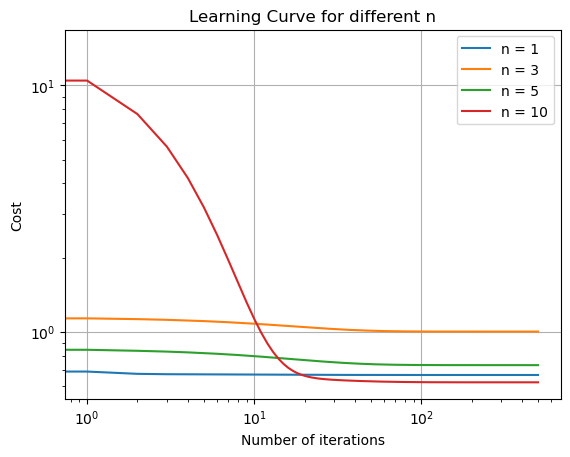

In [50]:
N = [1,3,5,10]
for n in N:
    X = give_X(40,n) # 生成训练集
    Y = give_Y(40)
    Theta = np.ones((n+1,1)) # 初始化
    Cost = np.zeros((iter,1)) # 记录每次迭代后损失函数的值
    for i in range(iter):
        Theta = Theta - a * gradient(X,Theta,Y)
        Cost[i] = cost(X,Theta,Y)
    plt.loglog(range(iter),Cost,label=f"n = {n}")

plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Learning Curve for different n")
plt.legend()
plt.grid(True)

好像每次的形状都不一样，损失函数最小的$n$也不一样

## 4.
用同样的函数形式，重新生成不同于训练集的$m=20$个样本作为测试集，计算测试集的J（即平均平方误差除以2）。对比上面两种方法的效果

我做了normal equation的函数，是`normal(m,n,X,Y)`

In [19]:
m_t = 20
N = list(range(1,11))
x_t = np.random.rand(m_t, N[2])
x_t = np.hstack((np.ones(m_t).reshape(m_t,1),x_t))
y_t = np.sin(7 * x_t) + np.random.randn(m_t, 1) * 0.1

In [20]:
# normal equation
cost_normal = np.zeros(len(N))
for i in range(len(N)):
    # 生成测试集
    x_t = np.random.rand(m_t, N[i])
    x_t = np.hstack((np.ones(m_t).reshape(m_t,1),x_t))
    p = np.zeros((N[i]+1,1))
    p = normal(40,N[i],X,Y)
    cost_normal[i] = cost(x_t,p,y_t)
print(cost_normal)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [21]:
# 梯度下降
cost_gradient = np.zeros(len(N))
for i in range(len(N)):
    x_t = np.random.rand(20, N[i]) # 生成测试集
    x_t = np.hstack((np.ones(20).reshape(20,1),x_t))
    Theta = np.zeros((N[i]+1,1)) # 初始化
    for j in range(iter):
        Theta = Theta - a * gradient(x_t,Theta,y_t)
    cost_gradient[i] = cost(x_t,Theta,y_t)

print(cost_gradient)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


发现梯度下降方法的损失函数远比用normal equation的小

Text(0, 0.5, 'Cost')

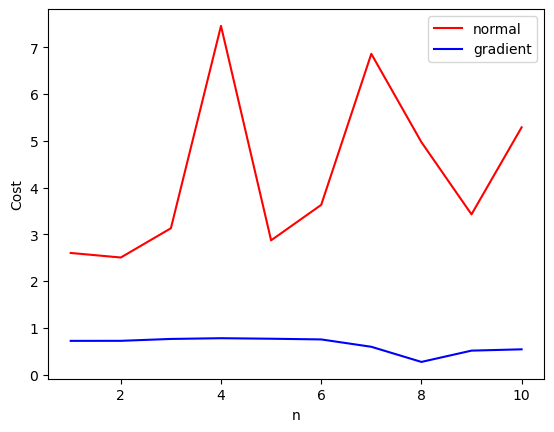

In [23]:
plt.plot(N,cost_normal,label="normal",color="red")
plt.plot(N,cost_gradient,label="gradient",color="blue")
plt.legend()
plt.xlabel("n")
plt.ylabel("Cost")

## 5.
尝试几次后，最终计算如下曲线：
y轴为J（样本平均平方误差），x轴为n，即多项式的最高次幂，画两条曲线，一条是训练样本的J，一条是测试样本的J

这里只做梯度下降的

In [24]:
# 训练样本
cost_train = np.zeros(len(N))
for i in range(len(N)):
    X = give_X(40,N[i]) # 生成训练集
    Y = give_Y(40)
    Theta = np.zeros((N[i]+1,1)) # 初始化
    for j in range(iter):
        Theta = Theta - a * gradient(X,Theta,Y)
    cost_train[i] = cost(X,Theta,Y)

print(cost_train)

[0.80869013 0.80495883 0.92638675 0.45888861 0.70012933 0.64072565
 0.71391162 0.76851187 0.72489497 0.50428674]


In [52]:
# 测试样本
cost_test = np.zeros(len(N))
for i in range(len(N)):
    x_t = np.random.rand(20, N[i]) # 生成测试集
    x_t = np.hstack((np.ones(20).reshape(m_t,1),x_t))
    Theta = np.zeros((N[i]+1,1)) # 初始化
    for j in range(iter):
        Theta = Theta - a * gradient(x_t,Theta,y_t)
    cost_test[i] = cost(x_t,Theta,y_t)

print(cost_test)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
[0.79967456 0.71124247 0.47617273 0.49131896]
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced V

ValueError: x and y must have same first dimension, but have shapes (4,) and (10,)

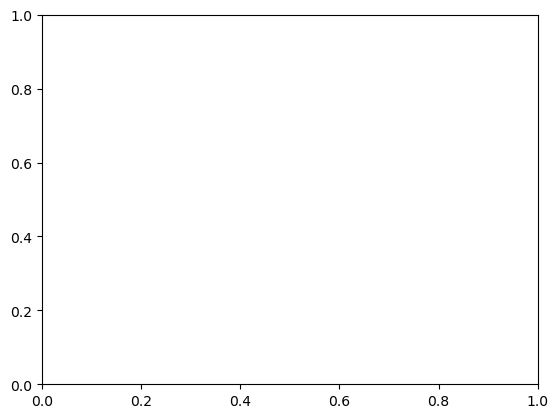

In [53]:
plt.plot(N,cost_train,label="train",color="red")
plt.plot(N,cost_test,label="test",color="blue")
plt.legend()
plt.xlabel("n")
plt.ylabel("Cost")

发现测试集的损失函数值明显高于训练集，而且随着$n$的增大，测试集的损失函数值逐渐降低

# 6.
用傅立叶级数作为假设函数，即
$$
h_{\theta}(x^i)=\theta_0+\theta_1\sin(x^i)+\theta_2\sin(2x^i)\cdots+\theta_n\sin(nx^i)
$$
重复上面的训练和预测过程

这里相当于把$x^k$换成$\sin(k\cdot x)$，其他的跟之前完全一样

## Normal equation

### 训练

X的生成方法不变，只变Y，现在Y的生成和$n$有关，同时再次remind这个函数
```
normal(m,n,X,Y)
```

Y的生成公式为
$$
y = 1+ \sin(x)+\sin(2x)+\cdots+\sin(nx)
$$

In [380]:
def give_Y(m,n):
    x = np.random.rand(m,1)
    Y = 1
    for i in range(n):
        Y += np.sin(i*x)
    return Y

In [382]:
print(normal(40,3,X,give_Y(40,3)))

[[ 2.55306735]
 [-0.32123935]
 [-0.32987909]
 [ 0.03127105]]Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



### 测试

In [384]:
m_t = 20
N = list(range(1,11))
cost_normal_f = np.zeros(len(N))
for i in range(len(N)):
    # 生成测试集
    x_t = np.random.rand(m_t, N[i])
    x_t = np.hstack((np.ones(m_t).reshape(m_t,1),x_t))
    y_t = give_Y(m_t,N[i])
    p = np.zeros((N[i]+1,1))
    p = normal(40,N[i],X,give_Y(40,N[i]))
    cost_normal_f[i] = cost(x_t,p,y_t)
print(cost_normal_f)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


会发现cost非常非常小，而且随着$n$增大而增大，这是normal equation的结果

## 梯度下降

In [386]:
cost_gradient_f = np.zeros(len(N))
for i in range(len(N)):
    x_t = np.random.rand(20, N[i]) # 生成测试集
    x_t = np.hstack((np.ones(20).reshape(20,1),x_t))
    y_t = give_Y(m_t,N[i])
    Theta = np.zeros((N[i]+1,1)) # 初始化
    for j in range(iter):
        Theta = Theta - a * gradient(x_t,Theta,y_t)
    cost_gradient_f[i] = cost(x_t,Theta,y_t)

print(cost_gradient_f)

[1.74420519e-13 3.07327118e-02 1.44131463e-01 2.35082593e-01
 1.83898814e-01 4.81531042e-01 1.06863043e+00 1.10279435e+00
 8.09170047e-01 6.68862086e-01]


看到cost同样非常小，作图跟normal equation的方法对比一下

Text(0, 0.5, 'Cost')

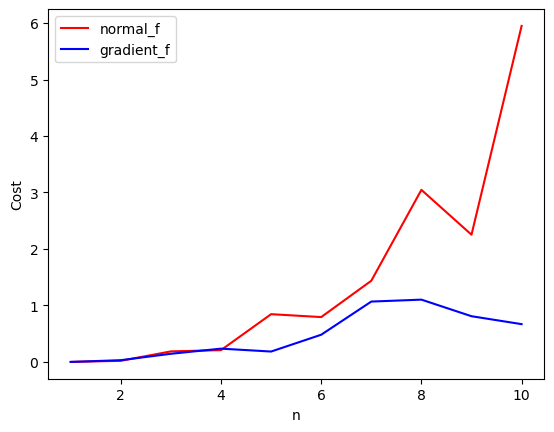

In [387]:
plt.plot(N,cost_normal_f,label="normal_f",color="red")
plt.plot(N,cost_gradient_f,label="gradient_f",color="blue")
plt.legend()
plt.xlabel("n")
plt.ylabel("Cost")

$n$比较小时两种方法的预测能力差不多，但$n$比较大是梯度下降法预测效果更好，这可能是因为normal equation法只适合线性模型，当最高次幂增大时会发生欠拟合的情况